# Notebook Overview (NB2)
This note is intended for asset (dataset) reduction.

Due to low memory capacity and immense amount of observation it is necessary for us to reduce the volume of data.

I have clearly indicated sections of notebook for a quick walk-thru. At this point and time, no major commentary will be given within this. The notebook's main objective is to help reduce the volume of data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', 200, 'display.max_columns', 200)

%config Completer.use_jedi = False

# Data Loading

In [2]:
Working_DF = pd.read_csv('clean_accepted.csv', low_memory=True)

In [3]:
Working_DF.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68341763,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68476807,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
4,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/bro

In [4]:
Working_DF.shape

(1345310, 93)

In [5]:
Working_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 93 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1345310 non-null  int64  
 1   loan_amnt                   1345310 non-null  float64
 2   funded_amnt                 1345310 non-null  float64
 3   funded_amnt_inv             1345310 non-null  float64
 4   term                        1345310 non-null  object 
 5   int_rate                    1345310 non-null  float64
 6   installment                 1345310 non-null  float64
 7   grade                       1345310 non-null  object 
 8   sub_grade                   1345310 non-null  object 
 9   emp_title                   1259525 non-null  object 
 10  emp_length                  1266799 non-null  object 
 11  home_ownership              1345310 non-null  object 
 12  annual_inc                  1345310 non-null  float64
 1

In [6]:
pd.crosstab(Working_DF['issue_d'],Working_DF['loan_status'],margins=False) #margins=True to view the total

loan_status,Charged Off,Fully Paid
issue_d,,
Apr-2008,27,128
Apr-2009,40,250
Apr-2010,82,745
Apr-2011,222,1341
Apr-2012,496,2734
Apr-2013,1504,7915
Apr-2014,3320,14852
Apr-2015,6509,25276
Apr-2016,6173,17931


## Cutting the data in half to save on low memory

In [7]:
data = Working_DF.sample(frac=0.5, axis=0, random_state=42).reset_index(drop=True)


In [8]:
data.shape

(672655, 93)

In [9]:
categorical = data.select_dtypes('object')
categorical.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,A,A4,eligibility Assistant,1 year,MORTGAGE,Not Verified,Aug-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=24765047,debt_consolidation,Debt consolidation,953xx,CA,Sep-2000,w,Mar-2015,Mar-2019,Individual,N,Cash,N
1,36 months,C,C4,Machine Operator,< 1 year,OWN,Verified,Jun-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=110702423,debt_consolidation,Debt consolidation,923xx,CA,Oct-2005,w,Sep-2018,Oct-2018,Joint App,N,Cash,N
2,36 months,C,C1,PCA,2 years,RENT,Source Verified,Oct-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=28704495,debt_consolidation,Debt consolidation,015xx,MA,Sep-2002,f,Mar-2017,Mar-2019,Individual,N,Cash,N
3,36 months,B,B5,NaN,NaN,OWN,Verified,Nov-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=65482216,other,Other,180xx,PA,Apr-2000,f,Nov-2018,Nov-2018,Individual,N,Cash,N
4,36 months,C,C1,Engineer,10+ years,MORTGAGE,Verified,May-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=78972388,credit_card,Credit card refinancing,791xx,TX,Oct-1994,w,Jan-2019,Jan-2019,Individual,N,Cash,N


In [10]:
categorical.isnull().any()

term                    False
grade                   False
sub_grade               False
emp_title                True
emp_length               True
home_ownership          False
verification_status     False
issue_d                 False
loan_status             False
pymnt_plan              False
url                     False
purpose                 False
title                    True
zip_code                 True
addr_state              False
earliest_cr_line        False
initial_list_status     False
last_pymnt_d             True
last_credit_pull_d       True
application_type        False
hardship_flag           False
disbursement_method     False
debt_settlement_flag    False
dtype: bool

In [11]:
categorical['grade'].value_counts()

B    196072
C    190752
A    117808
D    100860
E     46497
F     16188
G      4478
Name: grade, dtype: int64

## Second iteration of cutting the data to save on low memory

In [12]:
data_2 = data.sample(frac=0.5, axis=0, random_state=42).reset_index(drop=True)

In [13]:
data_2.shape

(336328, 93)

In [14]:
data_2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,103215536,25000.0,25000.0,25000.0,36 months,17.99,903.69,D,D2,Compliance Manager,1 year,MORTGAGE,67500.0,Source Verified,Mar-2017,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=103215536,debt_consolidation,Debt consolidation,750xx,TX,19.41,1.0,Oct-1995,660.0,664.0,1.0,25.0,0.0,43658.0,56.3,54.0,f,0.0,0.0,15828.970000,15828.97,8822.63,4707.73,0.0,2298.61,413.7498,Jul-2018,903.69,Dec-2018,569.0,565.0,0.0,1.0,Individual,0.0,244.0,173292.0,77500.0,8.0,7877.0,17096.0,39.4,0.0,0.0,151.0,257.0,3.0,3.0,2.0,3.0,3.0,6.0,5.0,13.0,8.0,12.0,10.0,22.0,42.0,13.0,25.0,0.0,0.0,0.0,5.0,84.9,25.0,0.0,0.0,233851.0,58157.0,28200.0,32102.0,N,Cash,N
1,51105809,10000.0,10000.0,9975.0,36 months,11.53,329.91,B,B5,customer service,3 years,RENT,45000.0,Not Verified,Jun-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=51105809,debt_consolidation,Debt consolidation,982xx,WA,29.23,0.0,Sep-2003,680.0,684.0,0.0,20.0,0.0,7459.0,58.3,28.0,f,0.0,0.0,11581.198232,11552.25,10000.00,1564.70,16.5,0.00,0.0000,Apr-2017,4643.00,Mar-2019,669.0,665.0,0.0,1.0,Individual,0.0,1888.0,62916.0,12800.0,4.0,3146.0,1014.0,71.0,0.0,0.0,75.0,45.0,9.0,9.0,0.0,9.0,9.0,1.0,2.0,6.0,3.0,7.0,14.0,7.0,13.0,6.0,20.0,0.0,0.0,0.0,2.0,96.4,66.7,0.0,0.0,71528.0,62916.0,3500.0,58728.0,N,Cash,N
2,6728064,6950.0,6950.0,6950.0,36 months,15.88,243.93,C,C4,"Hanson Construction Company, Inc",3 years,RENT,41810.0,Verified,Sep-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=6728064,debt_consolidation,Visa Free,986xx,WA,17.25,0.0,Aug-1988,665.0,669.0,3.0,6.0,1.0,10723.0,58.0,43.0,f,0.0,0.0,8781.472301,8781.47,6950.00,1831.47,0.0,0.00,0.0000,Sep-2016,243.92,Mar-2019,704.0,700.0,0.0,1.0,Individual,0.0,0.0,197096.0,18500.0,5.0,32849.0,157.0,98.4,0.0,0.0,140.0,304.0,6.0,6.0,2.0,38.0,2.0,0.0,1.0,2.0,1.0,8.0,10.0,4.0,31.0,2.0,6.0,0.0,0.0,0.0,3.0,100.0,100.0,1.0,0.0,233880.0,23540.0,10000.0,15380.0,N,Cash,N
3,59229385,24000.0,24000.0,23950.0,60 months,12.69,542.28,C,C2,Senior Consultant,3 years,MORTGAGE,100000.0,Not Verified,Sep-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=59229385,debt_consolidation,Debt consolidation,850xx,AZ,22.22,0.0,Sep-1996,695.0,699.0,0.0,9.0,0.0,22654.0,89.2,22.0,w,0.0,0.0,28846.054719,28785.96,24000.00,4846.05,0.0,0.00,0.0000,Jun-2017,17563.81,Oct-2017,719.0,715.0,0.0,1.0,Individual,0.0,0.0,281268.0,25400.0,3.0,31252.0,2746.0,89.2,0.0,0.0,227.0,184.0,8.0,8.0,2.0,8.0,4.0,0.0,4.0,4.0,4.0,8.0,10.0,4.0,9.0,4.0,9.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,344432.0,61697.0,25400.0,54244.0,N,Cash,N
4,60739473,18000.0,18000.0,18000.0,36 months,7.89,563.15,A,A5,Account Manager,2 years,R

In [15]:
data_2['grade'].value_counts()

B    97900
C    95284
A    58777
D    50646
E    23266
F     8198
G     2257
Name: grade, dtype: int64

In [16]:
#data_2['emp_title'].value_counts()

In [17]:
data_2['loan_status'].value_counts()

Fully Paid     269049
Charged Off     67279
Name: loan_status, dtype: int64

In [18]:
data_2['home_ownership'].value_counts()

MORTGAGE    166609
RENT        133482
OWN          36108
ANY             78
OTHER           39
NONE            12
Name: home_ownership, dtype: int64

In [19]:
data_2.to_csv("clean_accepted_2.csv", index=False)

Text(0.5, 1.0, 'Demographic of Target to Home Ownership')

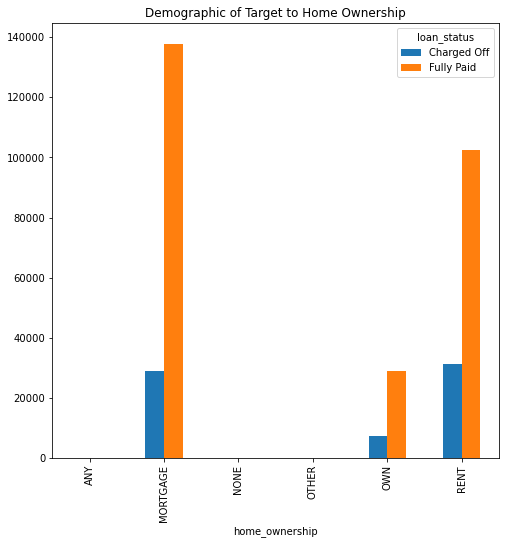

In [20]:
data_2.groupby(["home_ownership", "loan_status"]).size().unstack().plot(kind='bar', stacked=False, figsize=(8,8)).set_title('Demographic of Target to Home Ownership') 


## Checking for missing values

In [21]:
missing_row = data_2.isnull().sum(axis=1)

In [22]:
sum(missing_row > 10)

17120

In [23]:
## Dropping any row with missing values
columns = data_2.columns

In [24]:
columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [25]:
drop_missing = pd.DataFrame(data_2, columns=columns)

In [26]:
drop_missing.shape

(336328, 93)

In [27]:
data_2 = drop_missing.dropna()

In [28]:
data_2.shape

(246269, 93)

In [29]:
data_2.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.462690e+05,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,2.462690e+05,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,2.462690e+05,246269.000000,246269.000000,246269.0,246269.0,246269.000000,246269.000000,246269.000000,246269.000000,2.462690e+05,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.0,246269.000000,2.462690e+05,2.462690e+05,2.462690e+05,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.00000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,246269.000000,2.462690e+05,2.462690e+05,246269.000000,2.462690e+05
mean,5.855681e+07,14843.904734,14843.898237,14838.030051,13.388010,450.067854,7.952875e+04,18.656221,0.332636,695.060462,699.060564,0.689693,12.162428,0.223207,1.631294e+04,51.296546,26.107025,0.0,0.0,15279.960051,15273.910386,12545.542601,2477.424410,1.598624e+00,255.394415,43.016640,5818.568124,676.360118,659.540665,0.016896,1.0,0.005644,2.675785e+02,1.497566e+05,3.317125e+04,5.019280,13872.642740,10493.608980,59.450796,0.009616,14.558304,125.494967,176.051911,12.055001,6.978438,1.729889,22.482671,6.770442,0.55063,3.677491,5.665183,4.733267,8.260930,9.192347,8.507214,14.903520,5.688463,12.131628,0.000873,0.003728,0.084919,2.304943,94.277055,44.466408,0.137350,0.056243,1.838690e+05,5.322830e+04,21976.366672,4.584585e+04
std,3.733918e+07,8792.352950,8792.360815,8789.388802,4.820638,263.773444,7.269803e+04,9.242997,0.896352,31.010929,31.011422,0.927710,5.549445,0.645711,2.206675e+04,24.074832,12.079206,0.0,0.0,10476.362098,10472.642647,8991.141292,2665.157485,1.132027e+01,991.807081,174.009437,7348.978450,80.668784,131.285034,0.143408,0.0,0.081010,1.270094e+04,1.591442e+05,3.849156e+04,3.185758,15945.278437,15631.114566,28.206904,0.111054,742.939078,51.916487,89.514081,14.597219,6.805127,2.018104,28.712408,5.857512,1.38886,2.197490,3.213062,2.780137,4.808923,7.514466,4.606310,8.144323,3.224342,5.544633,0.031913,0.065190,0.492505,1.850813,8.516490,35.753841,0.386033,0.450941,1.776100e+05,4.958218e+04,21636.163690,4.459098e+04
min,5.612100e+04,1000.000000,1000.000000,750.000000,5.310000,14.010000,2.400000e+03,-1.000000,0.000000,660.000000,664.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,3.000000,0.0,0.0,37.620000,37.620000,0.000000,0.000000,-2.000000e-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,2.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.

In [30]:
##Saving into CSV
data_2.to_csv("clean_accepted_2.csv", index=False)

In [31]:
missing_percent = data_2.isna().mean().sort_values(ascending = False).round(4) * 100

In [32]:
missing_percent

id                            0.0
chargeoff_within_12_mths      0.0
num_accts_ever_120_pd         0.0
mths_since_recent_inq         0.0
mths_since_recent_bc          0.0
mort_acc                      0.0
mo_sin_rcnt_tl                0.0
mo_sin_rcnt_rev_tl_op         0.0
mo_sin_old_rev_tl_op          0.0
mo_sin_old_il_acct            0.0
delinq_amnt                   0.0
bc_util                       0.0
last_fico_range_low           0.0
bc_open_to_buy                0.0
avg_cur_bal                   0.0
acc_open_past_24mths          0.0
total_rev_hi_lim              0.0
tot_cur_bal                   0.0
tot_coll_amt                  0.0
acc_now_delinq                0.0
application_type              0.0
policy_code                   0.0
num_actv_bc_tl                0.0
num_actv_rev_tl               0.0
num_bc_sats                   0.0
num_bc_tl                     0.0
disbursement_method           0.0
hardship_flag                 0.0
total_il_high_credit_limit    0.0
total_bc_limit

# Data Cleansing

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Demographic of Target')

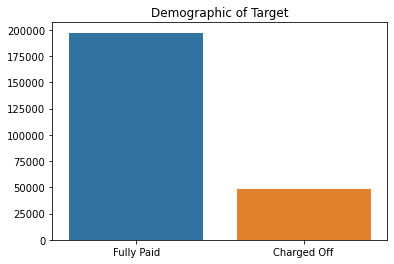

In [33]:
import seaborn as sns 
target = data_2['loan_status'].value_counts()
sns.barplot(target.index, target.values).set_title('Demographic of Target')
#plt.savefig('Target_bar')

In [34]:
data_2['loan_status'].value_counts()

Fully Paid     197386
Charged Off     48883
Name: loan_status, dtype: int64

In [35]:
categorical = data_2.select_dtypes('object')
categorical.describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
count,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269
unique,2,7,35,94194,11,6,3,77,2,1,246269,13,10039,898,51,662,2,78,78,2,1,2,2
top,36 months,C,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=70361885,debt_consolidation,Debt consolidation,750xx,CA,Aug-2001,w,Aug-2018,Mar-2019,Individual,N,Cash,N
freq,183412,71260,15641,4419,86809,126956,102862,8711,197386,246269,1,145597,129904,2914,34771,1901,150365,7372,88403,241649,246269,244995,239873


In [36]:
sorted(categorical)

['addr_state',
 'application_type',
 'debt_settlement_flag',
 'disbursement_method',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'hardship_flag',
 'home_ownership',
 'initial_list_status',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_d',
 'loan_status',
 'purpose',
 'pymnt_plan',
 'sub_grade',
 'term',
 'title',
 'url',
 'verification_status',
 'zip_code']

In [37]:
categorical.shape

(246269, 23)

In [38]:
continous = data_2.select_dtypes('number').head()
continous.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.00000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.00000,5.0,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.0000
mean,4.620292e+07,16190.000000,16190.000000,16165.000000,16.616000,492.000000,63862.000000,22.67000,0.600000,673.00000,677.00000,0.80000,15.20000,0.200000,18752.600000,57.420000,38.200000,0.0,0.0,16445.817053,16416.548000,12954.526000,3028.268000,3.300000,459.722000,82.749960,6044.134000,645.000000,641.000000,0.0,1.0,0.200000,426.400000,193589.800000,34160.000000,6.000000,18192.000000,8468.600000,65.040000,0.200000,0.0,135.600000,183.200000,5.60000,5.60000,1.600000,12.000000,5.200000,1.80000,3.200000,6.0000,4.800000,11.600000,10.600000,9.800000,25.200000,6.0000,15.20000,0.0,0.0,0.200000,4.0,93.460000,60.840000,0.200000,0.0,236655.200000,50644.200000,19280.000000,42709.8000
std,3.956117e+07,8119.759849,8119.759849,8114.369969,5.334658,256.180065,23251.617578,4.73933,0.894427,14.40486,14.40486,1.30384,7.79102,0.447214,15144.788024,22.605464,12.969194,0.0,0.0,7699.171551,7678.187917,6856.430936,1612.424071,7.379024,1027.969643,185.034536,6989.431903,73.942545,73.942545,0.0,0.0,0.447214,823.862124,84796.686505,25799.864341,2.915476,13451.053174,9965.560034,30.908704,0.447214,0.0,60.916336,102.969413,3.04959,3.04959,0.894427,14.849242,3.114482,2.48998,1.643168,4.1833,3.114482,6.655825,1.949359,7.563068,13.791302,4.1833,7.79102,0.0,0.0,0.447214,2.0,7.468467,40.995768,0.447214,0.0,103511.540176,16414.765204,11753.169785,18418.1722
min,6.728064e+06,6950.000000,6950.000000,6950.000000,11.530000,243.930000,41810.000000,17.25000,0.000000,660.00000,664.00000,0.00000,6.00000,0.000000,7459.000000,25.300000,22.000000,0.0,0.0,8781.472301,8781.470000,6950.000000,1564.700000,0.000000,0.000000,0.000000,243.920000,564.000000,560.000000,0.0,1.0,0.000000,0.000000,62916.000000,12800.000000,3.000000,3146.000000,157.000000,27.200000,0.000000,0.0,75.000000,45.000000,2.00000,2.00000,0.000000,2.000000,2.000000,0.00000,1.000000,2.0000,1.000000,7.000000,9.000000,4.000000,9.000000,2.0000,6.00000,0.0,0.0,0.000000,2.0,84.900000,12.500000,0.000000,0.0,71528.000000,23540.000000,3500.000000,15380.0000
25%,1.073581e+07,10000.000000,10000.000000,9975.000000,12.690000,329.910000,45000.000000,19.41000,0.000000,665.00000,669.00000,0.00000,9.00000,0.000000,9269.000000,56.300000,28.000000,0.0,0.0,11581.198232,11552.250000,8822.630000,1831.470000,0.000000,0.000000,0.000000,903.690000,569.000000,565.000000,0.0,1.0,0.000000,0.000000,173292.000000,18500.000000,4.000000,7877.000000

In [39]:
sorted(continous.columns)

['acc_now_delinq',
 'acc_open_past_24mths',
 'annual_inc',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'dti',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'id',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'loan_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'policy_code',
 'pub_rec',
 'pub_rec_bankrup

In [40]:
continous.shape

(5, 70)

Creating a keep_list of which features that are important to focus on based on domain knownledge. 

Also these features are key regarding the application process. 



In [41]:
keep_features = ['addr_state', 'annual_inc', 'application_type', 'bc_util', 'dti', 'earliest_cr_line', 'emp_length',
                    'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 
                     'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d','loan_amnt',
                        'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose',
                         'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term',
                         'title', 'tot_cur_bal', 'total_acc', 'verification_status', 'zip_code']

In [42]:
drop_features = [columns for columns in data_2.columns if columns not in keep_features]

In [43]:
sorted(drop_features)

['acc_now_delinq',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'delinq_2yrs',
 'delinq_amnt',
 'disbursement_method',
 'funded_amnt',
 'funded_amnt_inv',
 'hardship_flag',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'out_prncp',
 'out_prncp_inv',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'policy_code',
 'tot_coll_amt',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_hi

In [44]:
len(drop_features)

56

In [45]:
data_2.drop(labels=drop_features, axis=1, inplace=True)

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246269 entries, 0 to 336327
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    246269 non-null  int64  
 1   loan_amnt             246269 non-null  float64
 2   term                  246269 non-null  object 
 3   int_rate              246269 non-null  float64
 4   installment           246269 non-null  float64
 5   grade                 246269 non-null  object 
 6   sub_grade             246269 non-null  object 
 7   emp_title             246269 non-null  object 
 8   emp_length            246269 non-null  object 
 9   home_ownership        246269 non-null  object 
 10  annual_inc            246269 non-null  float64
 11  verification_status   246269 non-null  object 
 12  issue_d               246269 non-null  object 
 13  loan_status           246269 non-null  object 
 14  pymnt_plan            246269 non-null  object 
 15  

# Saving New Asset (xlsx and csv)

In [47]:
file_name = 'final_ds.xlsx'

In [48]:
# saving the excel 
data_2.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [70]:
data_2.to_csv("clean_accepted_2.csv", index=False)

# Lite EDA



In [49]:
data_2['loan_status'].value_counts()

Fully Paid     197386
Charged Off     48883
Name: loan_status, dtype: int64

In [50]:
continous = data_2.select_dtypes('number').head()
continous.describe()

,id,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,tot_cur_bal,bc_util,mort_acc,pub_rec_bankruptcies,tax_liens
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.00000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,4.620292e+07,16190.000000,16.616000,492.000000,63862.000000,22.67000,673.00000,677.00000,0.80000,15.20000,0.200000,18752.600000,57.420000,38.200000,459.722000,193589.800000,65.040000,1.600000,0.200000,0.0
std,3.956117e+07,8119.759849,5.334658,256.180065,23251.617578,4.73933,14.40486,14.40486,1.30384,7.79102,0.447214,15144.788024,22.605464,12.969194,1027.969643,84796.686505,30.908704,0.894427,0.447214,0.0
min,6.728064e+06,6950.000000,11.530000,243.930000,41810.000000,17.25000,660.00000,664.00000,0.00000,6.00000,0.000000,7459.000000,25.300000,22.000000,0.000000,62916.000000,27.200000,0.000000,0.000000,0.0
25%,1.073581e+07,10000.000000,12.690000,329.910000,45000.000000,19.41000,665.00000,669.00000,0.00000,9.00000,0.000000,9269.000000,56.300000,28.000000,0.000000,173292.000000,39.400000,2.000000,0.000000,0.0
50%,5.110581e+07,15000.000000,15.880000,440.190000,65000.000000,22.22000,665.00000,669.00000,0.00000,16.00000,0.000000,10723.000000,58.000000,43.000000,0.000000,197096.000000,71.000000,2.000000,0.000000,0.0
75%,5.922938e+07,24000.000000,17.990000,542.280000,67500.000000,25.24000,680.00000,684.00000,1.00000,20.00000,0.000000,22654.000000,58.300000,44.000000,0.000000,253377.000000,89.200000,2.000000,0.000000,0.0
max,1.032155e+08,25000.000000,24.990000,903.690000,100000.000000,29.23000,695.00000,699.00000,3.00000,25.00000,1.000000,43658.000000,89.200000,54.000000,2298.610000,281268.000000,98.400000,2.000000,1.000000,0.0


In [51]:
sorted(continous.columns)

['annual_inc',
 'bc_util',
 'dti',
 'fico_range_high',
 'fico_range_low',
 'id',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'loan_amnt',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'recoveries',
 'revol_bal',
 'revol_util',
 'tax_liens',
 'tot_cur_bal',
 'total_acc']

In [52]:
categorical = data_2.select_dtypes('object')
categorical.describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
count,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269
unique,2,7,35,94194,11,6,3,77,2,1,13,10039,898,51,662,2,2
top,36 months,C,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Fully Paid,n,debt_consolidation,Debt consolidation,750xx,CA,Aug-2001,w,Individual
freq,183412,71260,15641,4419,86809,126956,102862,8711,197386,246269,145597,129904,2914,34771,1901,150365,241649


In [53]:
sorted(categorical.columns)

['addr_state',
 'application_type',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'issue_d',
 'loan_status',
 'purpose',
 'pymnt_plan',
 'sub_grade',
 'term',
 'title',
 'verification_status',
 'zip_code']